# Student Result Analysis

## Problem Statement:
The goal of this analysis is to explore how various personal and socio-economic factors influence students' academic performance. Using a dataset that includes students' exam scores alongside demographic information such as gender, ethnicity, parental education, and sports activity, we aim to identify patterns and relationships between these factors and academic outcomes. Specifically, we seek to understand whether factors such as parents' education level, marital status, or students' dietary habits impact their performance across subjects.


## Objectives:
1. **Gender Distribution**: Analyze the gender distribution of students in the dataset and assess any noticeable patterns.
2. **Impact of Parental Education**: Investigate how the educational background of parents correlates with students' exam performance.
3. **Parental Marital Status**: Examine the influence of parental marital status on students’ test scores.
4. **Ethnic Group Analysis**:
   - Analyze the distribution of students across different ethnic groups.
   - Compare the average scores across ethnic groups to see if ethnicity has any impact on performance.
5. **Effect of Sport Practice**: Evaluate whether participation in sports affects students' academic results.
6. **Other Factors**: Explore other socio-economic and personal factors (e.g., diet, number of siblings, transportation means) to identify their potential impact on student scores.


## GitHub Repository:
For the full code, visit the GitHub repository: [Student Result Analysis](https://github.com/Rushi2810/Student-Result-Analysis)


# Import Neccesary Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Load dataset into a DataFrame

In [16]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

## Summary statistics of numerical columns

In [17]:
df.describe()


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


## Summary of the DataFrame

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


##  Count the number of missing values in each column

In [19]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop unnamed column

In [20]:
df = df.drop("Unnamed: 0", axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Dropped Null Values

In [21]:
df = df.dropna()
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

## Check the Duplicate Values

In [22]:
duplicates = df[df.duplicated(keep=False)] # keep=False to display all duplicate rows across all columns, not just the first occurrence
print(duplicates)

Empty DataFrame
Columns: [Gender, EthnicGroup, ParentEduc, LunchType, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild, NrSiblings, TransportMeans, WklyStudyHours, MathScore, ReadingScore, WritingScore]
Index: []


# Transform Weekly Study Hours Column

In [23]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("10-May","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5-10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5-10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


# Gender Distribution 

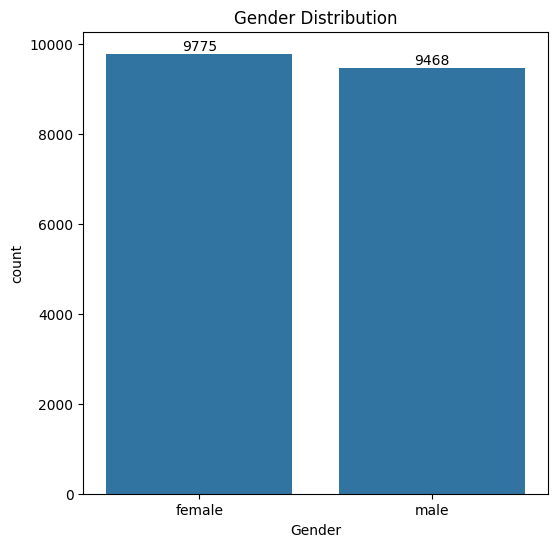

In [24]:
plt.figure(figsize= (6,6))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

### Based on the chart, we've observed that the number of females in the dataset exceeds the number of males.

## Group by parental education level and calculate mean scores for Math, Reading, and Writing

In [25]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.541478     71.317685     70.551080
bachelor's degree   70.724379     73.560401     73.873964
high school         64.294461     67.284124     65.495892
master's degree     72.293680     75.922677     76.423792
some college        66.578305     69.300113     68.651525
some high school    62.522417     65.438218     63.572171


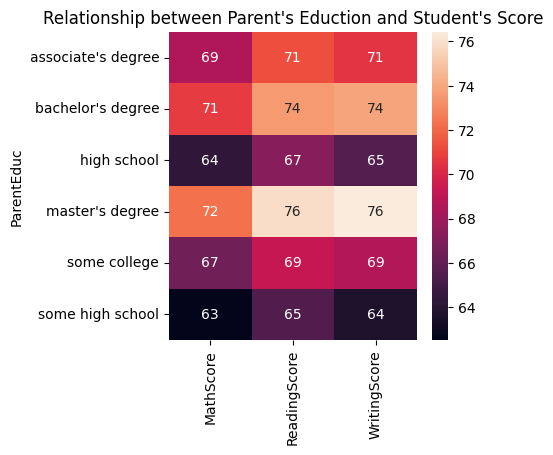

In [26]:
plt.figure(figsize= (4,4))
sns.heatmap(gb, annot = True)
plt.title("Relationship between Parent's Eduction and Student's Score")
plt.show()

### From the chart, we have concluded that parental education has a positive impact on student scores.

## Mean scores by parental marital status

In [27]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.730344     69.816339     68.954545
married              66.705241     69.474248     68.488509
single               66.285590     69.388021     68.543403
widowed              68.083784     70.662162     69.651351


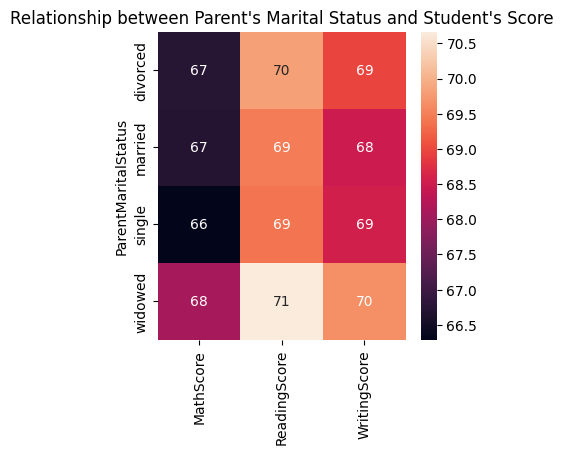

In [28]:
plt.figure(figsize= (4,4))
sns.heatmap(gb1, annot = True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

### From the chart, we have concluded that parental marital status has a no/negligible impact on student scores.

## Display unique ethnic groups in the dataset

In [29]:
print(df["EthnicGroup"].unique())

['group B' 'group C' 'group D' 'group A' 'group E']


# Distribution of Ethnic Groups

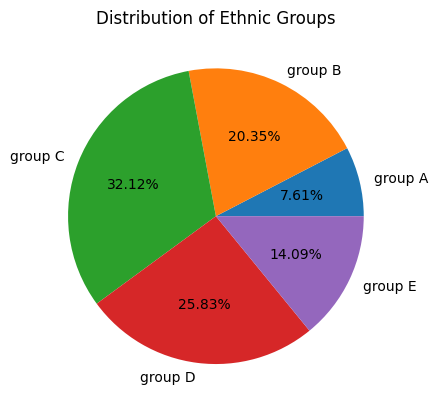

In [30]:
groupA = df.loc[(df['EthnicGroup'] == "group A")]. count()
groupB = df.loc[(df['EthnicGroup'] == "group B")]. count()
groupC = df.loc[(df['EthnicGroup'] == "group C")]. count()
groupD = df.loc[(df['EthnicGroup'] == "group D")]. count()
groupE = df.loc[(df['EthnicGroup'] == "group E")]. count()

l = ["group A", "group B", "group C", "group D", "group E"]

mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.title("Distribution of Ethnic Groups")
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.show()

### The chart indicates that Group C is the largest among the ethnic groups.

##  Mean scores by ethnic group

In [31]:
gb2 = df.groupby("EthnicGroup").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb2)

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      63.092150     66.715358     65.088055
group B      63.565262     67.339208     65.978544
group C      64.674163     68.578709     67.178774
group D      67.823742     70.608652     71.140040
group E      75.274336     74.435103     72.886062


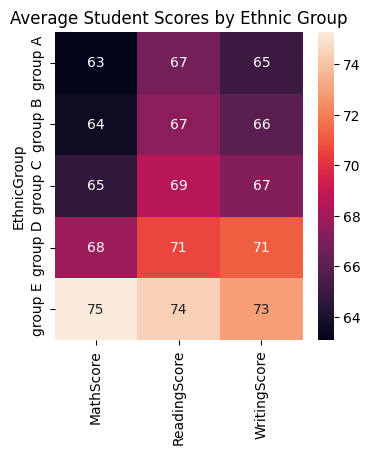

In [32]:
plt.figure(figsize= (4,4))
sns.heatmap(gb2, annot = True)
plt.title("Average Student Scores by Ethnic Group")
plt.show()

### In the heatmap, it is evident that students from the Group E ethnic group have the highest average scores.

# Impact of sport practice

In [33]:
print(df["PracticeSport"].unique())

['sometimes' 'regularly' 'never']


## Mean scores based on sports participation

In [34]:
gb3 = df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb3)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.593871     68.774244     67.021334
regularly      67.636547     69.950791     69.641439
sometimes      66.461143     69.438085     68.279568


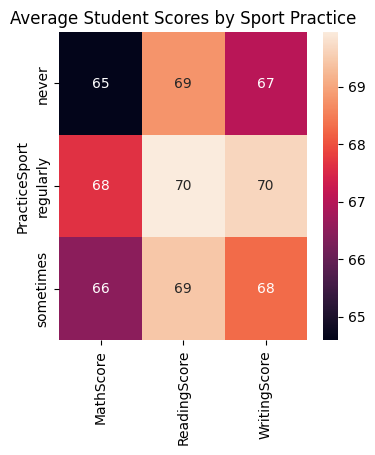

In [35]:
plt.figure(figsize= (4,4))
sns.heatmap(gb3, annot = True)
plt.title("Average Student Scores by Sport Practice")
plt.show()

### From the chart, we have concluded that sport practice has a no/negligible impact on student scores.

## Conclusion:
Based on our analysis of the dataset, the following conclusions were drawn:
- **Gender Distribution**: The dataset reveals that there are more female students than male students.
- **Parental Education**: A positive correlation was found between parental education level and student performance, suggesting that students whose parents have higher educational qualifications tend to score better.
- **Parental Marital Status**: Parental marital status appeared to have no significant impact on student scores.
- **Ethnic Group**: Ethnic Group C had the largest representation in the dataset, while students from Ethnic Group E had the highest average scores.
- **Sports Practice**: Participation in sports did not show any significant impact on students' academic performance.

These findings provide insight into the factors that influence academic outcomes and can be used to guide future studies or educational strategies aimed at improving student performance.

## Recommendations:
Based on the analysis and findings, the following recommendations are made:
1. **Enhance Parental Engagement**: Schools should implement programs to engage parents and encourage them to pursue higher education, as this positively impacts their children's academic performance.
2. **Tailored Educational Support**: Provide additional academic support and resources for students from backgrounds with lower parental education levels to help bridge the performance gap.
3. **Focus on Inclusivity**: Ensure that educational resources and opportunities are equitably distributed among all ethnic groups to promote fairness and equal access to academic success.
4. **Encourage Healthy Lifestyles**: While sports participation showed negligible impact, promoting a balanced lifestyle that includes physical activity and a nutritious diet can still benefit overall student well-being and engagement.